In [1]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [3]:
X,y = make_circles(100,factor=0.1,noise=.1)

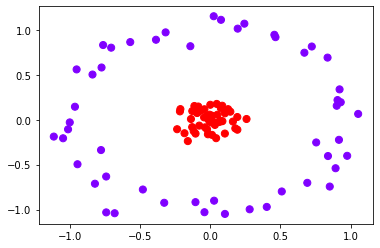

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plt.show()

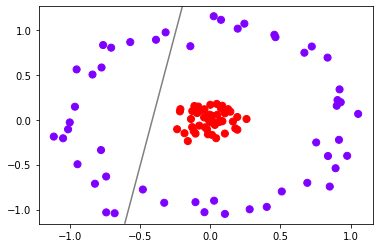

In [5]:
#线性核函数分类效果
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plot_svc_decision_function(clf)

In [6]:
clf.score(X,y)

0.69

为非线性数据增加维度并绘制3D图像

In [7]:
#定义一个由X计算出来的新维度r
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r))

In [8]:
r

array([0.34449047, 0.42046806, 0.30072572, 0.34576542, 0.97376507,
       0.35153066, 0.48788979, 0.34634757, 0.99141655, 0.97051526,
       0.35538675, 0.32931613, 0.27969045, 0.28049793, 0.97041507,
       0.93521368, 0.99965224, 0.33144027, 0.92129152, 0.29614007,
       0.32068005, 0.4105857 , 0.935603  , 0.33219497, 0.94283486,
       0.38756225, 0.36804931, 0.98408337, 0.99779377, 0.99433622,
       0.99364647, 0.33679712, 0.98499345, 0.3851492 , 0.44339316,
       0.32880258, 0.30715848, 0.96588196, 0.37850033, 0.97181743,
       0.2785903 , 0.99774704, 0.96583469, 0.32020933, 0.53079736,
       0.99902679, 0.98586474, 0.41938812, 0.38211778, 0.97483861,
       0.97169066, 0.39245432, 0.96470359, 0.43377572, 0.999678  ,
       0.50209162, 0.94544605, 0.26535244, 0.30527939, 0.97171747,
       0.95690587, 0.36585742, 0.38783928, 0.32849339, 0.34178943,
       0.96892916, 0.9813681 , 0.38211699, 0.94662039, 0.99685745,
       0.34295963, 0.99462549, 0.39032499, 0.99550346, 0.99220

In [9]:
# 定义一个绘制三维图像的函数
def plot_3D(X=X,y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

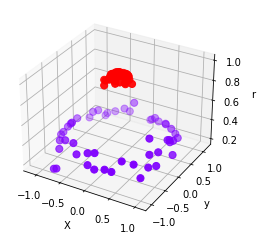

In [10]:
plot_3D()

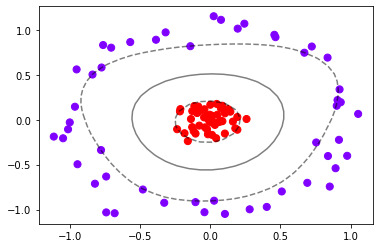

In [17]:
#高斯径向基核函数分类效果
clf = SVC(kernel='rbf').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plot_svc_decision_function(clf)

In [12]:
clf.support_vectors_ #返回支持向量

array([[-0.77685114, -0.33788763],
       [-0.8374908 ,  0.50272622],
       [ 0.02785412, -0.90140034],
       [ 0.75450457, -0.25317545],
       [-0.14102752,  0.8179755 ],
       [ 0.67047429,  0.74563786],
       [ 0.25868841,  0.00778116],
       [-0.1590892 , -0.23805333],
       [-0.23531129, -0.10579525],
       [-0.21200838,  0.11796856],
       [ 0.19353906, -0.11139045]])

In [13]:
clf.n_support_ #返回每个类中支持向量的个数

array([6, 5])

In [18]:
clf.score(X,y) #平均准确度

1.0